In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
df = pd.read_csv('Automobile_data.csv')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    object 
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13  curb-weight        203 non-null    int64  
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    object 
 16  engine-size        203 non

In [0]:
df['horsepower'].replace('?',np.nan, inplace=True)
df = df.dropna()

In [0]:
df = df.sort_values(['horsepower','highway-mpg'],ascending=False)

In [0]:
df['horsepower'] = df.horsepower.astype('int')
df['highway-mpg'] = df['highway-mpg'].astype('int')

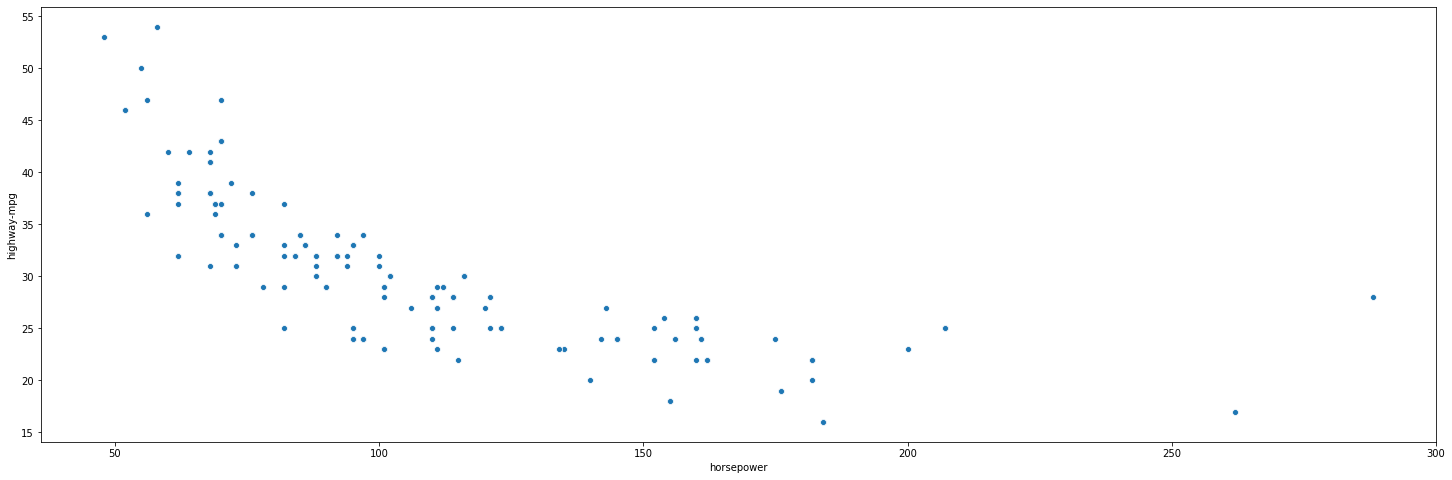

In [0]:
import seaborn as sns

fig,ax = plt.subplots()
fig.set_size_inches(25, 8)

ax = sns.scatterplot(x='horsepower',y='highway-mpg',data=df)

In [0]:
df2 = df[['horsepower','highway-mpg']]

df2.describe()

,horsepower,highway-mpg
count,203.000000,203.000000
mean,104.256158,30.748768
std,39.714369,6.920406
min,48.000000,16.000000
25%,70.000000,25.000000
50%,95.000000,30.000000
75%,116.000000,35.000000
max,288.000000,54.000000


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 100 to 42
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   horsepower   203 non-null    int64
 1   highway-mpg  203 non-null    int64
dtypes: int64(2)
memory usage: 4.8 KB


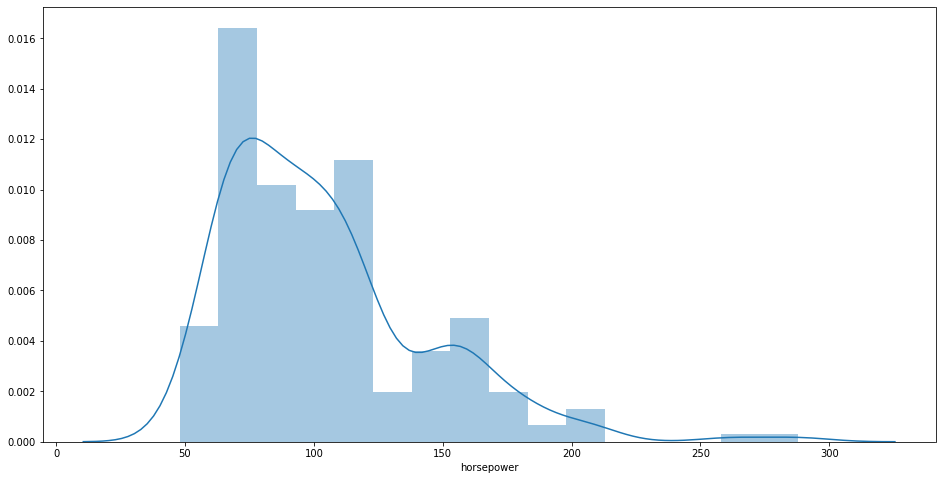

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(df2.horsepower)

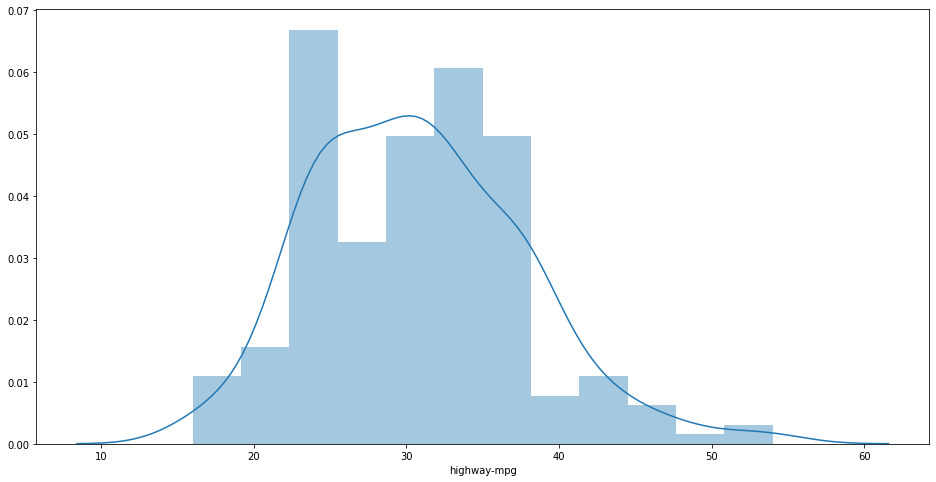

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

ax = sns.distplot(df2['highway-mpg'])

In [0]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.
df2.corr()

,horsepower,highway-mpg
horsepower,1.000000,-0.770908
highway-mpg,-0.770908,1.000000


In [0]:
#buat variabel x dan y.
x = df2['horsepower'].values.reshape(-1,1)
y = df2['highway-mpg'].values.reshape(-1,1)

In [0]:
#sisihkan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [0]:
#membuat object model
lin_reg = LinearRegression()

In [0]:
#training model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#print coefisieen dan intercept
print('Regression Model is y = {:2.2f}x + {:2.2f}'.format(lin_reg.coef_[0][0],lin_reg.intercept_[0]))

Regression Model is y = -0.13x + 44.17


In [0]:
lin_reg.score(x_test, y_test)

0.5985757127334701

Text(0.5, 1.0, 'Plot Horsepower vs MPG in Highway')

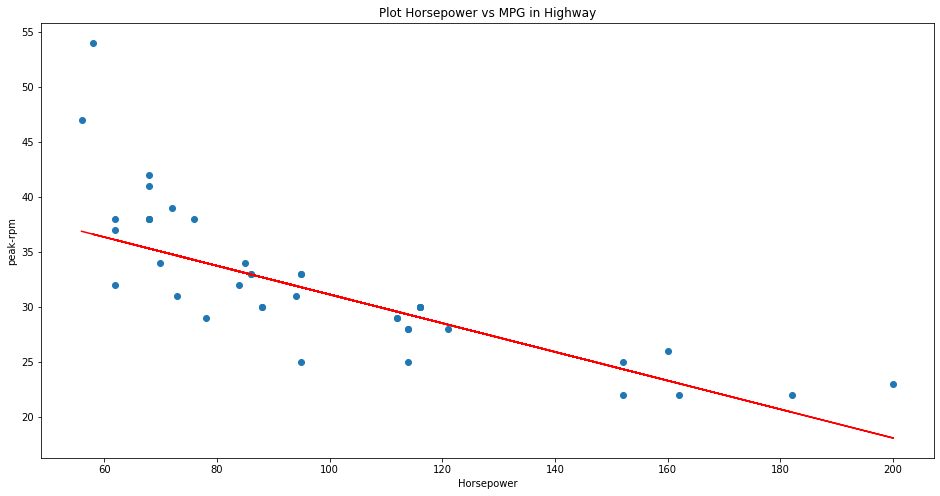

In [0]:
fig,ax = plt.subplots()
fig.set_size_inches(16, 8)

y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('peak-rpm')
plt.title('Plot Horsepower vs MPG in Highway')

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_prediksi)
mse = mean_squared_error(y_test,y_prediksi)

print('MAE: {}\nMSE: {}'.format(mae,mse))

MAE: 2.8246871889185026
MSE: 17.82314283428003


#sumber : https://medium.com/@adiptamartulandi/belajar-machine-learning-simple-linear-regression-di-python-e82972695eaf